This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and structure index.

- $\rho$ vs $SI$

This note differs `radio-to-optical-offset-vs-SI` by using all the common sources between ICRF3 and Gaia-CRF2 at three bands.

In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# My progs
from CorrTest import NWSmooth, new_corr_test

In [2]:
# VLBI-Gaia offset
sx_gaia_offset = Table.read("../data/icrf3sx_gedr3_all_combined.fits")
sx_gaia_offset.keep_columns(["iers_name", "ang_sep_cor", "pa_cor", "nor_sep_cor"])

k_gaia_offset = Table.read("../data/icrf3k_gedr3_all_combined.fits")
k_gaia_offset.keep_columns(["iers_name", "ang_sep_cor", "pa_cor", "nor_sep_cor"])

xka_gaia_offset = Table.read("../data/icrf3xka_gedr3_all_combined.fits")
xka_gaia_offset.keep_columns(["iers_name", "ang_sep_cor", "pa_cor", "nor_sep_cor"])

In [3]:
# SI data
si_x = Table.read("../data/si_x-all.fits")
si_k = Table.read("../data/si_k-all.fits")

# Cross-match
# SX-Gaia vs. SI_X
sx2g_x = join(sx_gaia_offset, si_x, keys="iers_name")
sx2g_x.keep_columns(["ang_sep_cor", "nor_sep_cor",
                     "si_med", "epo_med", "si_c15", "epo_c15"])
print("Find X-band structure index for {:d} SX sources "
      "({:d} in all)".format(len(sx2g_x), len(sx_gaia_offset)))

# K-Gaia vs. SI_X
k2g_x = join(k_gaia_offset, si_x, keys="iers_name")
k2g_x.keep_columns(["ang_sep_cor", "nor_sep_cor",
                    "si_med", "epo_med", "si_c15", "epo_c15"])
print("Find X-band structure index for {:d} K sources "
      "({:d} in all)".format(len(k2g_x), len(k_gaia_offset)))

# XKa-Gaia vs. SI_X
ka2g_x = join(xka_gaia_offset, si_x, keys="iers_name")
ka2g_x.keep_columns(["ang_sep_cor", "nor_sep_cor",
                     "si_med", "epo_med", "si_c15", "epo_c15"])
print("Find X-band structure index for {:d} XKa sources "
      "({:d} in all)".format(len(ka2g_x), len(xka_gaia_offset)))

# SX-Gaia vs. SI_K
sx2g_k = join(sx_gaia_offset, si_k, keys="iers_name")
sx2g_k.keep_columns(["ang_sep_cor", "nor_sep_cor",
                     "si_med", "epo_med", "si_c15", "epo_c15"])
print("Find K-band structure index for {:d} SX sources "
      "({:d} in all)".format(len(sx2g_k), len(sx_gaia_offset)))

# K-Gaia vs. SI_K
k2g_k = join(k_gaia_offset, si_k, keys="iers_name")
k2g_k.keep_columns(["ang_sep_cor", "nor_sep_cor",
                    "si_med", "epo_med", "si_c15", "epo_c15"])
print("Find K-band structure index for {:d} K sources "
      "({:d} in all)".format(len(k2g_k), len(k_gaia_offset)))

# XKa-Gaia vs. SI_K
ka2g_k = join(xka_gaia_offset, si_k, keys="iers_name")
ka2g_k.keep_columns(["ang_sep_cor", "nor_sep_cor",
                     "si_med", "epo_med", "si_c15", "epo_c15"])
print("Find K-band structure index for {:d} XKa sources "
      "({:d} in all)".format(len(ka2g_k), len(xka_gaia_offset)))

Find X-band structure index for 956 SX sources (3142 in all)
Find X-band structure index for 435 K sources (660 in all)
Find X-band structure index for 385 XKa sources (576 in all)
Find K-band structure index for 236 SX sources (3142 in all)
Find K-band structure index for 234 K sources (660 in all)
Find K-band structure index for 224 XKa sources (576 in all)


# 1. Overall distribution

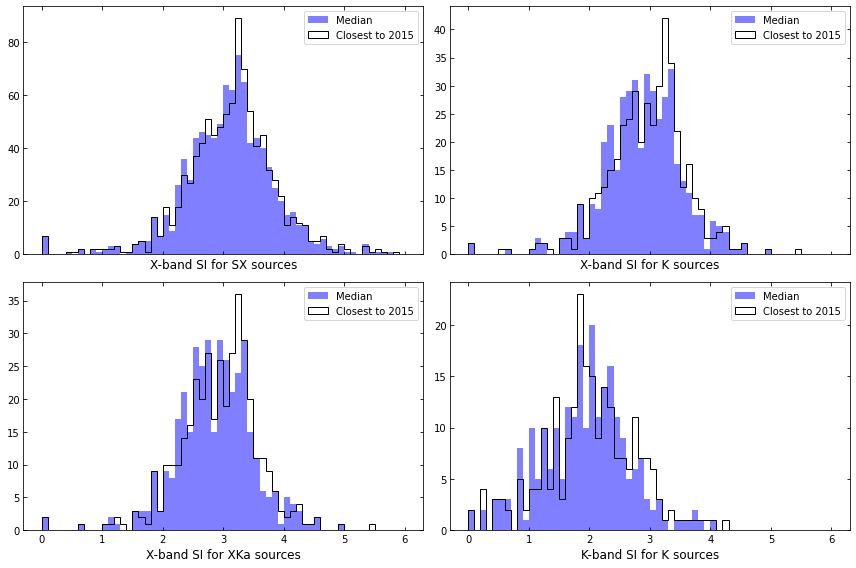

In [4]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
    figsize=(12, 8), ncols=2, nrows=2, sharex=True)

bins = np.arange(0, 6.1, 0.1)

ax0.hist(sx2g_x["si_med"], bins=bins, histtype="stepfilled",
         color="b", alpha=0.5, label="Median")
ax0.hist(sx2g_x["si_c15"], bins=bins, histtype="step", 
         color="k", label="Closest to 2015")
ax0.set_xlabel("X-band SI for SX sources", fontsize=12)

ax1.hist(k2g_x["si_med"], bins=bins, histtype="stepfilled",
         color="b", alpha=0.5, label="Median")
ax1.hist(k2g_x["si_c15"], bins=bins, histtype="step", 
         color="k", label="Closest to 2015")
ax1.set_xlabel("X-band SI for K sources", fontsize=12)

ax2.hist(ka2g_x["si_med"], bins=bins, histtype="stepfilled",
         color="b", alpha=0.5, label="Median")
ax2.hist(ka2g_x["si_c15"], bins=bins, histtype="step", 
         color="k", label="Closest to 2015")
ax2.set_xlabel("X-band SI for XKa sources", fontsize=12)

ax3.hist(k2g_k["si_med"], bins=bins, histtype="stepfilled",
         color="b", alpha=0.5, label="Median")
ax3.hist(k2g_k["si_c15"], bins=bins, histtype="step", 
         color="k", label="Closest to 2015")
ax3.set_xlabel("K-band SI for K sources", fontsize=12)

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()

# 2. Correlation test

## 2.1 Angular separation $\rho$ (SX, K, XKa)  vs.  SI (X)

In [5]:
keys = "si_c15"
sx2g_x.sort(keys)
k2g_x.sort(keys)
ka2g_x.sort(keys)

x_sx1 = np.array(sx2g_x[keys])
x_k1 = np.array(k2g_x[keys])
x_xka1 = np.array(ka2g_x[keys])

y_sx1 = np.array(sx2g_x["ang_sep_cor"])
y_k1 = np.array(k2g_x["ang_sep_cor"])
y_xka1 = np.array(ka2g_x["ang_sep_cor"])

nw_mean_sx1 = NWSmooth(x_sx1, y_sx1)
nw_mean_k1 = NWSmooth(x_k1, y_k1)
nw_mean_xka1 = NWSmooth(x_xka1, y_xka1)

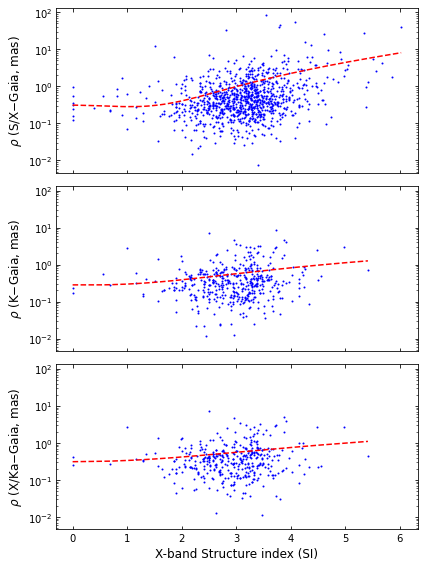

In [6]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x_sx1, y_sx1, "b.", ms=2)
ax1.plot(x_k1, y_k1, ".b", ms=2)
ax2.plot(x_xka1, y_xka1, "b.", ms=2)

# Smoothed data
ax0.plot(x_sx1, nw_mean_sx1, "r--")
ax1.plot(x_k1, nw_mean_k1, "r--")
ax2.plot(x_xka1, nw_mean_xka1, "r--")

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("X-band Structure index (SI)", fontsize=12)

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

In [15]:
new_corr_test(x_sx1, [y_sx1], [nw_mean_sx1],
              obj_name="Rho (SX) vs. SI (X)",
              ylabel=["SX"])
print("\n")

new_corr_test(x_k1, [y_k1], [nw_mean_k1],
              obj_name="Rho (K) vs. SI (X)",
              ylabel=["K"])
print("\n")

new_corr_test(x_xka1, [y_xka1], [nw_mean_xka1],
              obj_name="Rho (XKa) vs. SI (X)",
              ylabel=["XKa"])

Rho (SX) vs. SI (X)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +1.8e-01   2.1e-08  +2.5e-01   1.2e-15  +1.7e-01   1.3e-15
-----------------------------------------------------------------
Smoothed
SX          +8.8e-01  1.0e-303  +1.0e+00   0.0e+00  +1.0e+00   0.0e+00
-----------------------------------------------------------------


Rho (K) vs. SI (X)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
K           +1.5e-01   1.4e-03  +1.3e-01   5.0e-03  +8.9e-02   5.5e-03
-----------------------------------------------------------------
Smoothed
K           +9.7e-01  1.5e-263  +1.0e+00   0.0e+00  +1.0e+00  1.1e-210
-------------------------------------

## 2.2 Angular separation $\rho$ (SX, K, XKa) vs. SI (K)

In [8]:
keys = "si_c15"
sx2g_k.sort(keys)
k2g_k.sort(keys)
ka2g_k.sort(keys)

x_sx2 = np.array(sx2g_k[keys])
x_k2 = np.array(k2g_k[keys])
x_xka2 = np.array(ka2g_k[keys])

y_sx2 = np.array(sx2g_k["ang_sep_cor"])
y_k2 = np.array(k2g_k["ang_sep_cor"])
y_xka2 = np.array(ka2g_k["ang_sep_cor"])

nw_mean_sx2 = NWSmooth(x_sx2, y_sx2)
nw_mean_k2 = NWSmooth(x_k2, y_k2)
nw_mean_xka2 = NWSmooth(x_xka2, y_xka2)

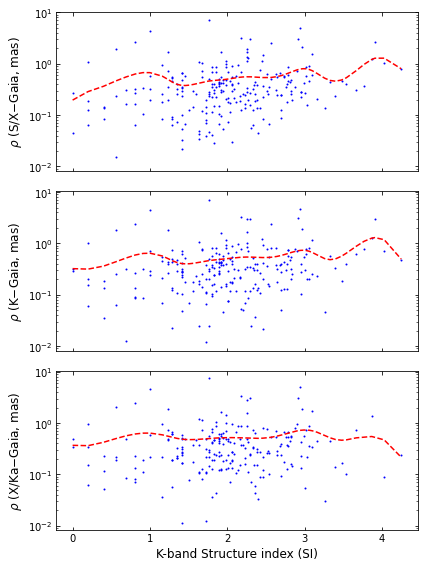

In [9]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x_sx2, y_sx2, "b.", ms=2)
ax1.plot(x_k2, y_k2, ".b", ms=2)
ax2.plot(x_xka2, y_xka2, "b.", ms=2)

# Smoothed data
ax0.plot(x_sx2, nw_mean_sx2, "r--")
ax1.plot(x_k2, nw_mean_k2, "r--")
ax2.plot(x_xka2, nw_mean_xka2, "r--")

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("K-band Structure index (SI)", fontsize=12)

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

In [16]:
new_corr_test(x_sx2, [y_sx2], [nw_mean_sx2],
              obj_name="Rho (SX) vs. SI (K)",
              ylabel=["SX"])
print("\n")

new_corr_test(x_k2, [y_k2], [nw_mean_k2],
              obj_name="Rho (K) vs. SI (K)",
              ylabel=["K"])
print("\n")

new_corr_test(x_xka2, [y_xka2], [nw_mean_xka2],
              obj_name="Rho (XKa) vs. SI (K)",
              ylabel=["XKa"])

Rho (SX) vs. SI (K)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +1.2e-01   6.3e-02  +2.5e-01   7.9e-05  +1.7e-01   7.8e-05
-----------------------------------------------------------------
Smoothed
SX          +6.8e-01   2.9e-33  +6.7e-01   9.9e-33  +6.2e-01   1.5e-44
-----------------------------------------------------------------


Rho (K) vs. SI (K)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
K           +1.1e-01   9.4e-02  +2.1e-01   1.2e-03  +1.4e-01   1.1e-03
-----------------------------------------------------------------
Smoothed
K           +6.7e-01   2.5e-31  +6.9e-01   9.7e-35  +6.3e-01   1.4e-45
-------------------------------------